In [2]:
import os
ROOT = "/content/drive/MyDrive/Colab Notebooks/DL/2-ANN using Tf.Keras" 
os.chdir(ROOT)

In [3]:
os.listdir()

['ANN_Tf_Keras_1.ipynb']

In [4]:
import tensorflow as tf

In [5]:
tf.__version__

'2.8.2'

In [6]:
tf.keras.__version__

'2.8.0'

In [7]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Implementing Keras sequetial classifier

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [9]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [10]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [11]:
y_train_full.shape, y_train_full.dtype

((60000,), dtype('uint8'))

In [12]:
X_test.shape , X_test.dtype

((10000, 28, 28), dtype('uint8'))

In [13]:
y_test.shape, y_test.dtype

((10000,), dtype('uint8'))

In [14]:
#Standardizing
X_valid, X_train = X_train_full[: 5000] / 255., X_train_full[5000: ]/255.
y_valid, y_train = y_train_full[: 5000], y_train_full[5000:]

X_test = X_test/255.

In [46]:
X_train.shape

(55000, 28, 28)

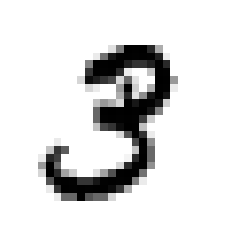

3

In [15]:
plt.imshow(X_train[1], cmap="binary")
plt.axis("off")
plt.show()
y_train[1]

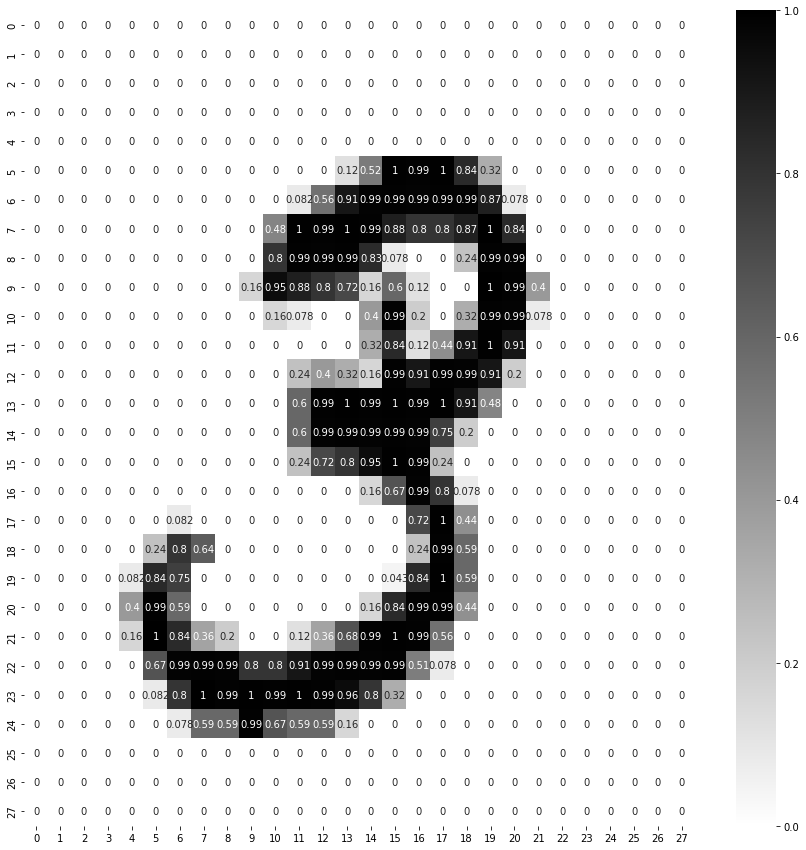

In [16]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_train[1], annot=True, cmap="binary")

In [19]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"), #first layer will have 784 points with ReLU as activation function
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"), #second layer will have 300 points with ReLU as activation function
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"), #third layer will have 100 points with ReLU as activation function
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"), #fourth layer will have 100 points with softmax as activation function for multiclass classification
          
]

In [20]:
model = tf.keras.models.Sequential(LAYERS) #all layers will be executed sequentially and not skip.

In [21]:
model.layers

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
784*300+300 #hidden layer 1

235500

In [26]:
100*300+100 #hidden layer 2

30100

In [27]:
10*100+10 #output layer

1010

In [33]:
sum([784*300+300, 100*300+100, 10*100+10])

266610

In [39]:
hidden1 = model.layers[1]

model.get_layer(hidden1.name)

In [40]:
hidden1.get_weights()

[array([[ 0.0169462 ,  0.01811778,  0.04380906, ..., -0.03726844,
         -0.06756222,  0.00573919],
        [-0.0534711 ,  0.00086571,  0.00693217, ..., -0.03802703,
          0.0052755 ,  0.03978036],
        [-0.00789794, -0.02116388,  0.00300673, ..., -0.02849193,
          0.02268143, -0.06177128],
        ...,
        [-0.03492475, -0.0362368 ,  0.05529572, ..., -0.06028406,
         -0.0248386 , -0.0643151 ],
        [-0.0379984 ,  0.07392424,  0.04695845, ..., -0.00409801,
          0.03710124,  0.06831844],
        [ 0.03217036,  0.04540136, -0.05352344, ...,  0.00037198,
          0.01319796,  0.01547697]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [41]:
weights, biases = hidden1.get_weights()

In [42]:
weights.shape

(784, 300)

In [43]:
biases.shape

(300,)

In [44]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [45]:
EPOCHS = 30 #it is number of iteration and default Batch_size = 32
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.5971 - accuracy: 0.8467 - val_loss: 0.3009 - val_accuracy: 0.9176
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2840 - accuracy: 0.9190 - val_loss: 0.2341 - val_accuracy: 0.9360
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2311 - accuracy: 0.9342 - val_loss: 0.2000 - val_accuracy: 0.9440
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1980 - accuracy: 0.9433 - val_loss: 0.1754 - val_accuracy: 0.9518
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1728 - accuracy: 0.9504 - val_loss: 0.1582 - val_accuracy: 0.9576
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1533 - accuracy: 0.9573 - val_loss: 0.1450 - val_accuracy: 0.9594
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1375 - accuracy: 0.9608 - val_loss: 0.1331 - val_accuracy:

In [47]:
55000/32

1718.75

In [48]:
model.evaluate(X_test, y_test) #97.8% accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.0698 - accuracy: 0.9787


[0.06984679400920868, 0.9786999821662903]

In [49]:
model.save("model.h5")

In [50]:
loaded_model = tf.keras.models.load_model("model.h5") #just to evaluate it model is correct loaded

In [51]:
loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0698 - accuracy: 0.9787


[0.06984679400920868, 0.9786999821662903]

In [52]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.597062,0.846691,0.300899,0.9176
1,0.284017,0.919000,0.234086,0.9360
2,0.231096,0.934164,0.199962,0.9440
3,0.197985,0.943345,0.175361,0.9518
4,0.172846,0.950382,0.158150,0.9576
5,0.153281,0.957291,0.145003,0.9594
6,0.137543,0.960836,0.133054,0.9640
7,0.124860,0.964418,0.125623,0.9664
8,0.113552,0.967709,0.119634,0.9668
9,0.104292,0.970273,0.109755,0.9678


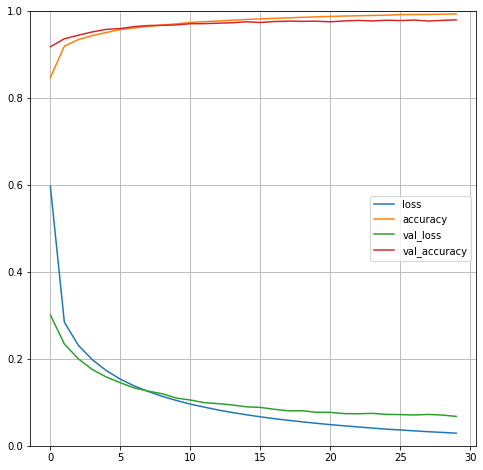

In [55]:
pd.DataFrame(history.history).plot(figsize=(8,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [61]:
#predicting the outcomes
X_new = X_test[:5]
y_new = y_test[:5]
y_proba = model.predict(X_new)
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.996, 0.001, 0.   , 0.   , 0.   , 0.   , 0.002, 0.001,
        0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.996, 0.   , 0.   , 0.   , 0.   ,
        0.004]], dtype=float32)

In [62]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred, y_new

(array([7, 2, 1, 0, 4]), array([7, 2, 1, 0, 4], dtype=uint8))

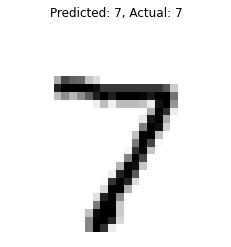

------------------------------------------------------------


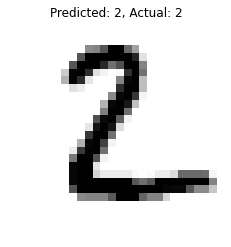

------------------------------------------------------------


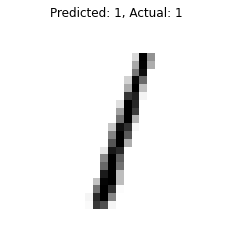

------------------------------------------------------------


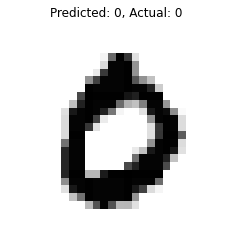

------------------------------------------------------------


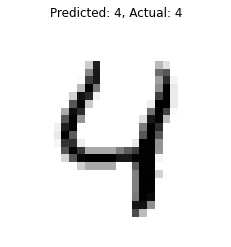

------------------------------------------------------------


In [63]:
for data, pred, actual in zip(X_new, y_pred, y_new):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)